In [179]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [180]:
data = pd.read_excel("C:/Users/Deeps/Music/MachineL/Assignment_2.xlsx")

In [181]:
data

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19827,November,2023-11-02,Reviews,Positive Reviews,Appreciation,Appreciation,shimmer-body-scrub-with-coffee,NaN,NaN
19828,November,2023-11-01,Reviews,Positive Reviews,Appreciation,Appreciation,naked-detox-green-tea-night-gel,NaN,NaN
19829,November,2023-11-01,Reviews,Positive Reviews,Appreciation,Appreciation,green-tea-15-vitamin-c-face-serum-for-glowing-...,NaN,NaN
19830,November,2023-11-01,Reviews,Positive Reviews,Appreciation,Appreciation,naked-raw-coffee-body-scrub-with-coconut,NaN,NaN


In [182]:
data.head(5)

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN


In [183]:
data.size

178488

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19832 entries, 0 to 19831
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    19832 non-null  object        
 1   Ticket Date              19832 non-null  datetime64[ns]
 2   Final - Class            19832 non-null  object        
 3   Source                   19832 non-null  object        
 4   Query Class              19832 non-null  object        
 5   Query Category           19832 non-null  object        
 6   Product Name             6571 non-null   object        
 7   Batch Number/Fcailities  5369 non-null   object        
 8   Remarks                  7188 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.4+ MB


In [185]:
data.columns

Index(['Month', 'Ticket Date', 'Final - Class', 'Source', 'Query Class',
       'Query Category', 'Product Name', 'Batch Number/Fcailities', 'Remarks'],
      dtype='object')

In [186]:
data.shape

(19832, 9)

In [187]:
#1. What is the quantum month on month from July to November?

In [188]:
m = data.groupby(['Month', 'Query Class']).size().rename('Count').reset_index()  # Resetting the index
data1 = m.pivot(index='Month', columns='Query Class', values='Count').fillna(0)
data1

Query Class,Appreciation,Delivery,OPerational,Operational,Packaging Issues,Product,Technical,Warehouse
Month,,,,,,,,
August,392.0,1371.0,0.0,625.0,312.0,619.0,348.0,552.0
July,363.0,1089.0,0.0,581.0,174.0,534.0,153.0,481.0
November,258.0,1104.0,1.0,542.0,254.0,563.0,405.0,565.0
October,311.0,1224.0,0.0,498.0,181.0,631.0,328.0,799.0
September,359.0,983.0,0.0,783.0,217.0,668.0,408.0,1156.0


<Figure size 1000x600 with 0 Axes>

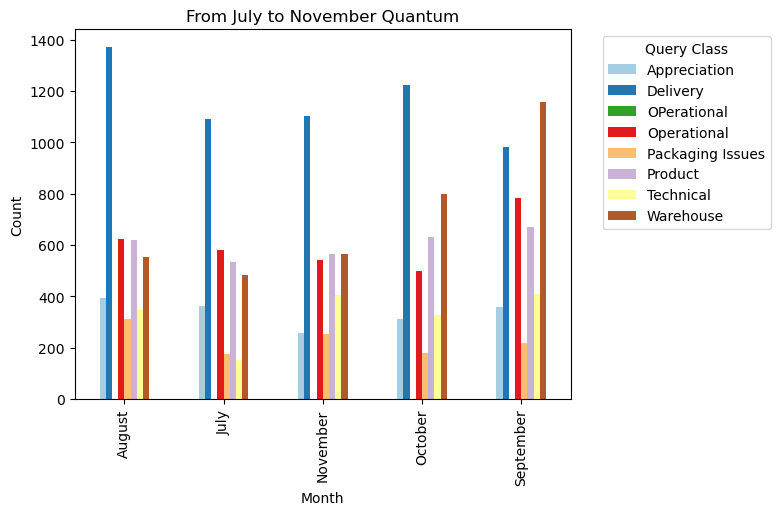

In [149]:
plt.figure(figsize=(10, 6))
data1.plot(kind='bar', colormap='Paired')
plt.title('From July to November Quantum')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Query Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [155]:
#2. What is the quantum of complaints excluding Appreciation?
complaints = data[data['Query Class']!='Appreciation']
complaints

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19569,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19570,November,2023-11-01,Inbound - CRM,Calls,Delivery,Delayed Order,NaN,NaN,NaN
19571,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19572,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN


In [156]:
quantum_of_complaints = complaints.groupby(['Month','Query Class']).size().rename('No. of Complaints').reset_index()
quantum_of_complaints 

,Month,Query Class,No. of Complaints
0,August,Delivery,1371
1,August,Operational,625
2,August,Packaging Issues,312
3,August,Product,619
4,August,Technical,348
5,August,Warehouse,552
6,July,Delivery,1089
7,July,Operational,581
8,July,Packaging Issues,174
9,July,Product,534


In [158]:
c_counts = quantum_of_complaints.pivot(index='Month', columns='Query Class', values='No. of Complaints').fillna(0)
c_counts

Query Class,Delivery,OPerational,Operational,Packaging Issues,Product,Technical,Warehouse
Month,,,,,,,
August,1371.0,0.0,625.0,312.0,619.0,348.0,552.0
July,1089.0,0.0,581.0,174.0,534.0,153.0,481.0
November,1104.0,1.0,542.0,254.0,563.0,405.0,565.0
October,1224.0,0.0,498.0,181.0,631.0,328.0,799.0
September,983.0,0.0,783.0,217.0,668.0,408.0,1156.0


<Figure size 1000x600 with 0 Axes>

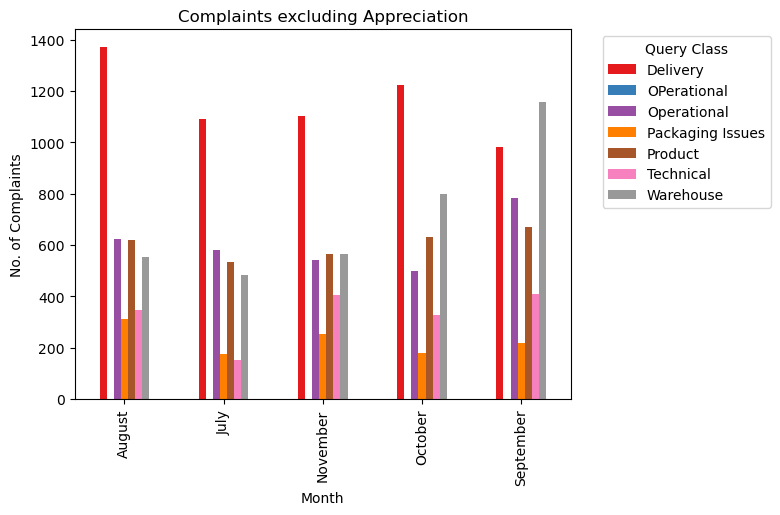

In [163]:
plt.figure(figsize=(10, 6))
c_counts.plot(kind='bar', colormap='Set1')
plt.title('Complaints excluding Appreciation')
plt.xlabel('Month')
plt.ylabel('No. of Complaints')
plt.legend(title='Query Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [89]:
#3. What is the quantum of delivery complaints (MOM) from July to November?

delivery_C= data[data['Query Class'] =='Delivery']
delivery_C['Month']=delivery_C['Ticket Date'].dt.month

#delivery_C['Month']=pd.to_datetime(delivery_C['Ticket Date']).dt.month

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15064\584000226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_C['Month']=delivery_C['Ticket Date'].dt.month


In [90]:
MOM = delivery_C[delivery_C['Month'].between(7,11)]
MOM

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
3,7,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,7,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN
5,7,2023-07-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
6,7,2023-07-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
7,7,2023-07-01,Inbound - CRM,Emails,Delivery,Fake Update/Order RTO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19569,11,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19570,11,2023-11-01,Inbound - CRM,Calls,Delivery,Delayed Order,NaN,NaN,NaN
19571,11,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19572,11,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN


In [91]:
GP=MOM.groupby('Month').size()
GP

Month
7     1089
8     1371
9      983
10    1224
11    1104
dtype: int64

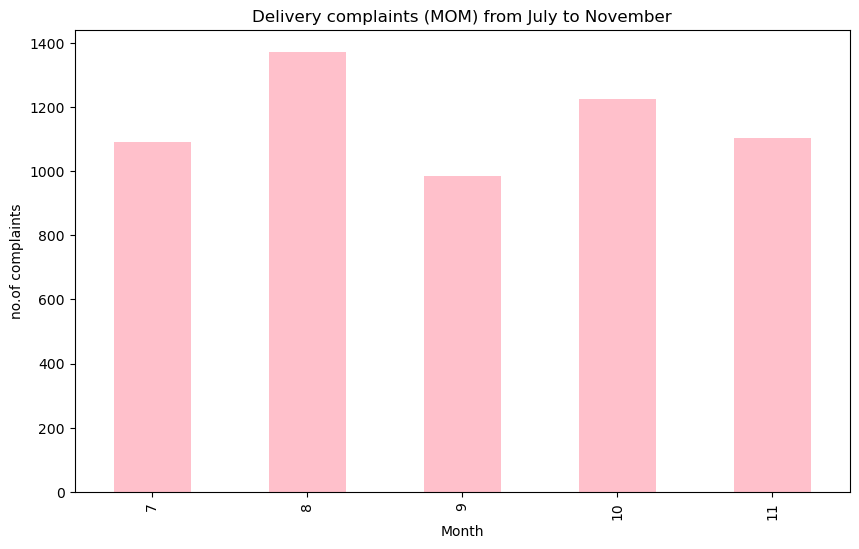

In [92]:
plt.figure(figsize=(10, 6))
GP.plot(kind='bar', color='pink')
plt.title('Delivery complaints (MOM) from July to November')
plt.xlabel('Month')
plt.ylabel('no.of complaints')
plt.show()

In [164]:
#4. Which product has highest complaint from Batch - B002?

highest_complaint= data[data['Batch Number/Fcailities']=='B002']
highest_complaint

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
936,July,2023-07-13,Inbound - CRM,Calls,Operational,Damaged,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Tip
942,July,2023-07-13,Inbound - CRM,Emails,Operational,Damaged,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Tip
1385,July,2023-07-19,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out
1443,July,2023-07-19,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick
1449,July,2023-07-19,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick
1497,July,2023-07-20,Inbound - CRM,Calls,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out
1551,July,2023-07-20,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out
1552,July,2023-07-20,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out
1584,July,2023-07-21,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick
1600,July,2023-07-21,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick


In [46]:
GP_Product= highest_complaint.groupby('Product Name').size()
GP_Product

Product Name
Cocoa Kiss Creamy Matte Lipstick-Blush Slush                                                  48
Cocoa Kiss Creamy Matte Lipstick-Caramel Marvel                                                2
Cocoa Kiss Creamy Matte Lipstick-Mauve Velvet,Cocoa Kiss Creamy Matte Lipstick-Blush Slush     1
Cocoa Kiss Creamy Matte Lipstick-Rose Martini                                                  1
Cocoa Kiss Creamy Matte Nude Lipstick with Cocoa Butter - Blush Slush                          1
dtype: int64

In [47]:
TOP_Product= GP_Product.max()
TOP_Product

48

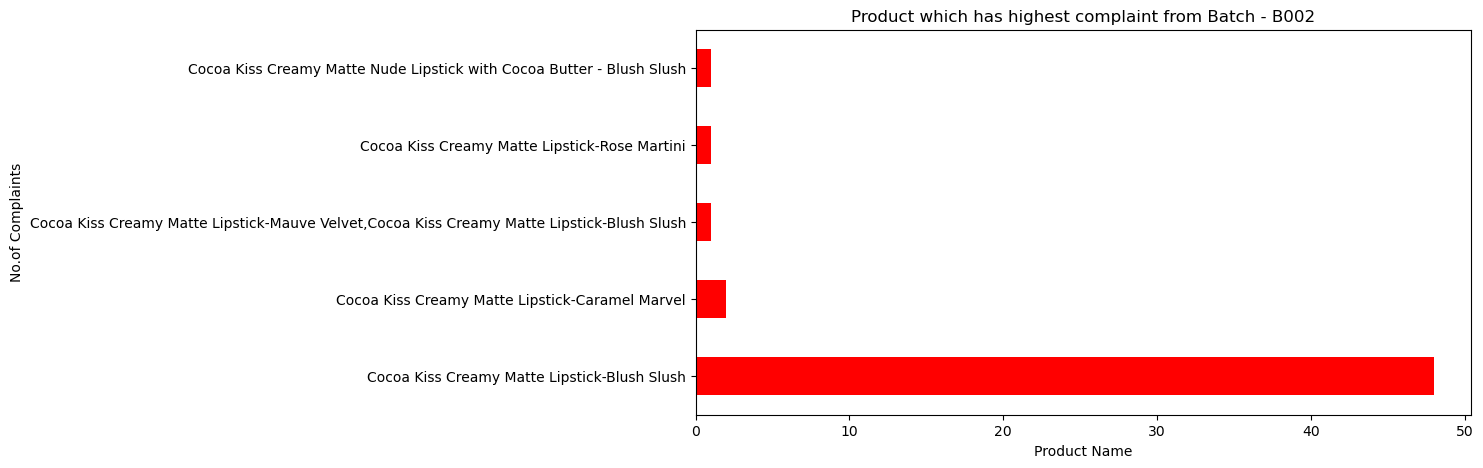

In [169]:
plt.figure(figsize=(10, 5))
GP_Product.plot(kind='barh', color='red')
plt.title('Product which has highest complaint from Batch - B002')
plt.xlabel('Product Name')
plt.ylabel('No.of Complaints')
plt.show()

In [173]:
#5. What is the quantum of complaints we received for the Batch - B220462?
complaint_batch= data[data['Batch Number/Fcailities']=='B220462']
complaint_batch

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
331,July,2023-07-04,Inbound - CRM,Calls,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
2695,July,2023-07-31,Inbound - CRM,Calls,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
5421,August,2023-08-03,Inbound - CRM,Calls,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
5434,August,2023-08-03,Inbound - CRM,Calls,Operational,Product Not Sealed,Latte Coffee Body Wash,B220462,Torn Foil
5613,August,2023-08-07,Inbound - CRM,Emails,Operational,Product Not Sealed,Latte Coffee Body Wash,B220462,Unsealed Product
5881,August,2023-08-10,Inbound - CRM,Emails,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
6023,August,2023-08-12,Inbound - CRM,Calls,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
6142,August,2023-08-16,Inbound - CRM,Calls,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
6152,August,2023-08-16,Inbound - CRM,Emails,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage
6209,August,2023-08-17,Inbound - CRM,Emails,Operational,Product Spillage,Latte Coffee Body Wash,B220462,Product Leakage


In [175]:
number_of_complaint= complaint_batch['Query Category'].value_counts()
number_of_complaint

Product Spillage      22
Product Not Sealed     4
Broken Product         1
Name: Query Category, dtype: int64

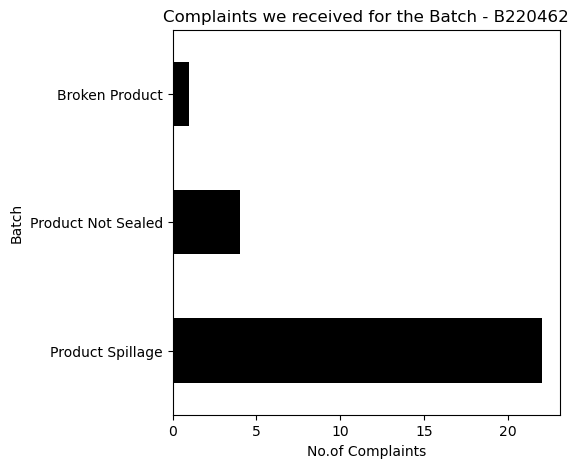

In [178]:
plt.figure(figsize=(5, 5))
number_of_complaint.plot(kind='barh',color='black')
plt.title('Complaints we received for the Batch - B220462')
plt.xlabel('No.of Complaints')
plt.ylabel('Batch')
plt.show()

In [52]:
#6. What all are the Query Categories under Delivery Query Class and the quantum of each Query Category?
QClass= data[data['Query Class']=='Delivery']
QClass

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN
5,July,2023-07-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
6,July,2023-07-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
7,July,2023-07-01,Inbound - CRM,Emails,Delivery,Fake Update/Order RTO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19569,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19570,November,2023-11-01,Inbound - CRM,Calls,Delivery,Delayed Order,NaN,NaN,NaN
19571,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN
19572,November,2023-11-01,Inbound - CRM,Emails,Delivery,Delayed Order,NaN,NaN,NaN


In [53]:
QCategory= QClass.groupby('Query Category').size()
QCategory

Query Category
Delayed Order                           2427
Delayed Order,Delivery Boy Complaint       1
Delayed Order,Order Detail Change          1
Delivery Boy Complaint                   178
Fake Update/Order RTO                   2572
Hub Address Request                       13
Lost/Destroyed/Damaged Order             131
Marked Delivered but not Received        429
Order Misrouted                           19
dtype: int64

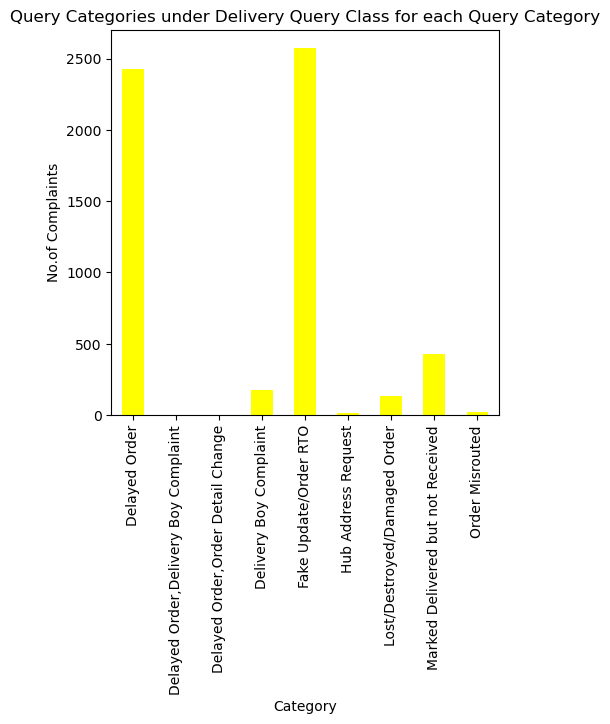

In [54]:
plt.figure(figsize=(5, 5))
QCategory.plot(kind = 'bar', color='yellow')
plt.title('Query Categories under Delivery Query Class for each Query Category')
plt.xlabel('Category')
plt.ylabel('No.of Complaints')
plt.show()

In [55]:
#7. Which Final-Class has the highest complaints?
Class_Complaints= data.groupby('Final - Class').size()
Class_Complaints

Final - Class
Inbound - CRM       14555
Inbound - Social     1459
Marketplaces         1576
Reviews              2242
dtype: int64

In [56]:
Qclass2= Class_Complaints.max()
Qclass2

14555

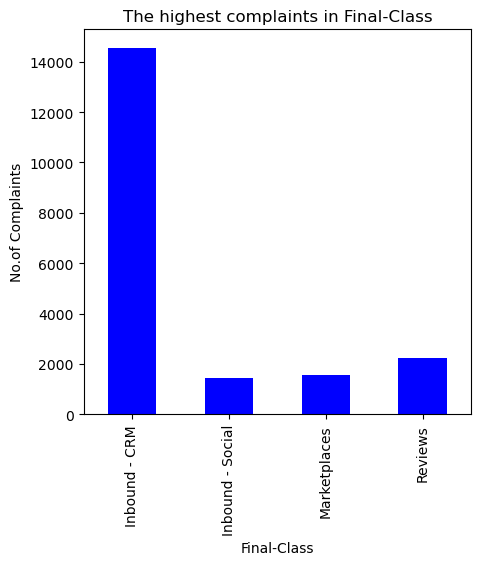

In [57]:
plt.figure(figsize=(5, 5))
Class_Complaints.plot(kind = 'bar', color='blue')
plt.title('The highest complaints in Final-Class')
plt.xlabel('Final-Class')
plt.ylabel('No.of Complaints')
plt.show()

# Questions 

In [100]:
##1 write a python program to find maximum occuring character in a string input= abracadabra
input1 = "abracadabra"
count ={}
for i in input1:
    if i in count:
        count[i]=count[i]+1
    else:
        count[i]=1
count1=max(count,key=count.get)      
print(count)
print(count1)
        
        
    

{'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1}
a


In [23]:
#2 write a function to find maximum elemnt in list
def max_n(L1):
    max_a = L1[0]
    for i in L1:
        if max_a<i:
            max_a=i
    return max_a   
max_n([4,5,6,2,3])

6

In [ ]:
#3 write a program to find table for 7
n =7
for i in range (1,11):
    print(n,"*",i,"=",n*i)

In [130]:
#4 write a python function to sort a numbers in ascending order using the selection sort algorithm
def sort_algorithm(D, S):
    
    for i in range(S):
        min_index = i
        for j in range(i + 1, S):
            if D[j] < D[min_index]:
                min_index = j
         # swapping the elements to sort the array
        (D[i], D[min_index]) = (D[min_index], D[i])
d = [-1, 75, 0, 15, 6,99,-301,-200,999]
S = len(d)
sort_algorithm(d, S)
print('The array after sorting in Ascending Order by selection sort is:',d)

    

The array after sorting in Ascending Order by selection sort is: [-301, -200, -1, 0, 6, 15, 75, 99, 999]


In [189]:
#5 Python Program to Check whether given string is Palindrome string or not
n = input("enter any word: ")
check= n[::-1]
if (n== check):
    print("it is palindrom")
else:
    print("it is not palindrom")

enter any word: madam
it is palindrom


In [4]:
#6 Python program to convert the temperature in degree centigrade to Fahrenheit
n = float(input("Enter Temp in Celsius:"))

fahrenheit_temperature = (n * 9/5) + 32

print(fahrenheit_temperature)


Enter Temp in Celsius:3.5
38.3


In [ ]:
#7 Python program to check whether the given integer is a multiple of both 5 and 7
n = int(input("Enter any integer number:"))
if (n%5==0)and (n%7==0):
    print(n,"is multiple of both 5 and 7")
else:
    print(n,"is not a multiple of both 5 and 7")

In [7]:
#8 Python program to find the average of 10 numbers using while loop
sum1 = 0
count = 0
while count < 10:
    num = float(input("Enter a number: "))
    sum1 = sum1+ num
    count= count+ 1

avg = sum1 / 10
print(avg)
    

Enter a number: 1
Enter a number: 2
Enter a number: 3
Enter a number: 4
Enter a number: 5
Enter a number: 6
Enter a number: 7
Enter a number: 8
Enter a number: 9
Enter a number: 10
5.5


In [74]:
#9 Python program to check whether the given integer is a prime number or not
n= int(input("Enter any number: "))
if n==1:
    print("It is unique number")
if n==2:
    print("It is prime number")
for i in range(2,n):
    if n%i==0:
        print("It is not prime number")
        break
else:
    print("It is a prime number")

Enter any number: 11
It is a prime number


In [75]:
#10 Python program to generate the prime numbers from 1 to N
for i in range (1,51):
    for j in range (2,i):
        if i % j ==0:
            break
    else:
        print(i)

1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47


In [9]:
#11 Write a program for variable length arguments
def add(*n):
    e = max(n)
    return e
check=add(1,2,3)
print(check)

3


In [103]:
list1 = [1,2,2,3,4,5,1]
list2 = []
for i in list1:
    if i not in list2:
        list2.append(i)
       
    
print(list2)        

[1, 2, 3, 4, 5]
